## Part 3 ­ Data analysis
*[5 points]*

Uber’s Driver team is interested in predicting which driver signups are most likely to start driving. To help explore this question, we have provided a sample1 dataset of a cohort of driver signups in January 2015. The data was pulled a few months after they signed up to include the result of whether they actually completed their first trip. It also includes several pieces of background information gather about the driver and their car.
We would like you to use this data set to help understand what factors are best at predicting whether a signup will start to drive, and offer suggestions to operationalize those insights to help Uber.
See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge. Please also call out any data related assumptions or issues that you encounter.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the driver signups took a first trip? (2 points)
2. Build a predictive model to help Uber determine whether or not a driver signup will start driving. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance. (2 points)
3. Briefly discuss how Uber might leverage the insights gained from the model to generate more first trips (again, a few ideas/sentences will suffice). (1 point)

| Variable         | Description       |
|------------------|-------------------|
|id: | driver_id|
|city_id : |city_id this user signed up in|
|signup_os : |signup device of the user (“android”, “ios”, “website”, “other”)|
|signup_channel : |what channel did the driver sign up from (“offline”, “paid”, “organic”, “referral”) |
|signup_timestamp : |timestamp of account creation; local time in the form ‘YYYY­MM­DD’ |
|bgc_date : |date of background check consent; in the form ‘YYYY­MM­DD’|
|vehicle_added_date : |date when driver’s vehicle information was uploaded; in the form ‘YYYY­MM­DD’|
|first_trip_date : |date of the first trip as a driver; in the form ‘YYYY­MM­DD’|
|vehicle_make:  |make of vehicle uploaded (i.e. Honda, Ford, Kia)|
|vehicle_model:  |model of vehicle uploaded (i.e. Accord, Prius, 350z)|
|vehicle_year:  |year that the car was made; in the form ‘YYYY’|

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../Uber - Data Scientist/ds_challenge_v2_1_data.csv')

### 1. Exploratory Data Analysis

In [2]:
data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


In [3]:
data.tail()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
54676,54677,Strark,other,Paid,1/15/16,NaN,NaN,NaN,NaN,NaN,NaN
54677,54678,Strark,other,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
54678,54679,Strark,ios web,Organic,1/6/16,NaN,NaN,NaN,NaN,NaN,NaN
54679,54680,Berton,android web,Paid,1/18/16,NaN,NaN,NaN,NaN,NaN,NaN
54680,54681,Berton,ios web,Organic,1/27/16,NaN,NaN,NaN,NaN,NaN,NaN


View the data types of each column:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
id                      54681 non-null int64
city_name               54681 non-null object
signup_os               47824 non-null object
signup_channel          54681 non-null object
signup_date             54681 non-null object
bgc_date                32896 non-null object
vehicle_added_date      13134 non-null object
vehicle_make            13223 non-null object
vehicle_model           13223 non-null object
vehicle_year            13223 non-null float64
first_completed_date    6137 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


Only id, city_name, signup_channel and signup_date have no Null values. 
Vehicle related variables as well as first_completed_date have way too many missing values. 

Perform some data type transformations, and create some new variables.

In [2]:
data['id']=str(data['id'])
data['signup_date'] =  pd.to_datetime(data['signup_date'], format='%m/%d/%y')
data['vehicle_added_date'] =  pd.to_datetime(data['vehicle_added_date'], format='%m/%d/%y')
data['bgc_date'] =  pd.to_datetime(data['bgc_date'], format='%m/%d/%y')
data['first_completed_date'] =  pd.to_datetime(data['first_completed_date'], format='%m/%d/%y')
data['started_driving'] = data['first_completed_date'].notnull()
data['has_bgc'] = data['bgc_date'].notnull()
data['has_va'] = data['vehicle_added_date'].notnull()

In [3]:
from datetime import date
d3 = data['first_completed_date']
d2 = data['vehicle_added_date']
d1 = data['bgc_date']
d0 = data['signup_date']
data['days_to_bgc'] = (d1 - d0)/ np.timedelta64(1, 'D')
data['days_to_va'] = (d2 - d0)/ np.timedelta64(1, 'D')
data['days_to_fc'] = (d3 - d0)/ np.timedelta64(1, 'D')

In [4]:
city_dummies = pd.get_dummies(data['city_name'])
data = data.join(city_dummies)

In [8]:
data.dtypes

id                              object
city_name                       object
signup_os                       object
signup_channel                  object
signup_date             datetime64[ns]
bgc_date                datetime64[ns]
vehicle_added_date      datetime64[ns]
vehicle_make                    object
vehicle_model                   object
vehicle_year                   float64
first_completed_date    datetime64[ns]
started_driving                   bool
has_bgc                           bool
has_va                            bool
days_to_bgc                    float64
days_to_va                     float64
days_to_fc                     float64
Berton                         float64
Strark                         float64
Wrouver                        float64
dtype: object

In [9]:
data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,started_driving,has_bgc,has_va,days_to_bgc,days_to_va,days_to_fc,Berton,Strark,Wrouver
0,0 1\n1 2\n2 3...,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT,False,False,False,NaN,NaN,NaN,0.0,1.0,0.0
1,0 1\n1 2\n2 3...,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT,False,False,False,NaN,NaN,NaN,0.0,1.0,0.0
2,0 1\n1 2\n2 3...,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT,False,True,False,0.0,NaN,NaN,0.0,0.0,1.0
3,0 1\n1 2\n2 3...,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,True,True,True,5.0,5.0,5.0,1.0,0.0,0.0
4,0 1\n1 2\n2 3...,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT,False,True,True,15.0,16.0,NaN,0.0,1.0,0.0


Let's start the EDA by looking at some variables distributions:

I want to see the distribution of **signups** by the different events' dates

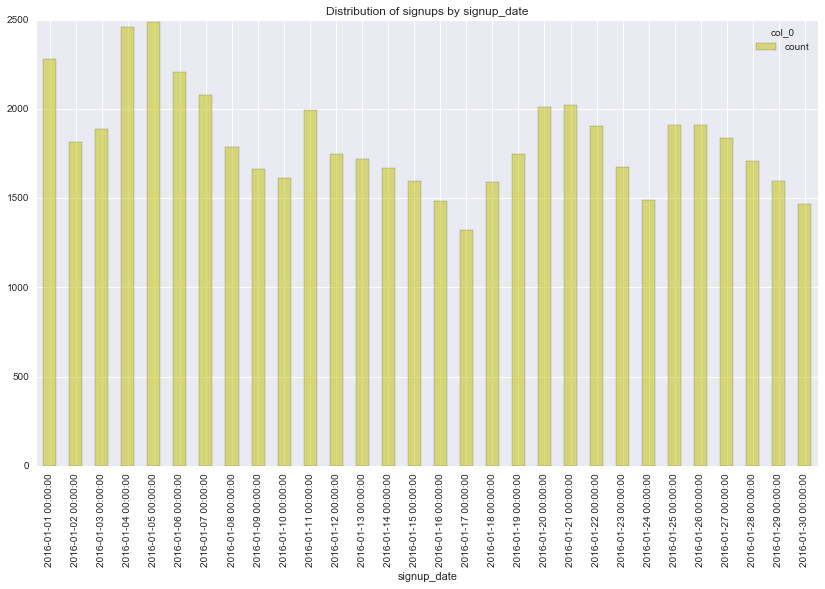

In [11]:
fc_ct = pd.crosstab(index = data['signup_date'],columns = "count")
ax = fc_ct.plot(kind="bar", 
                 figsize=(14,8), color = "y",  alpha=.5, title = 'Distribution of signups by signup_date')


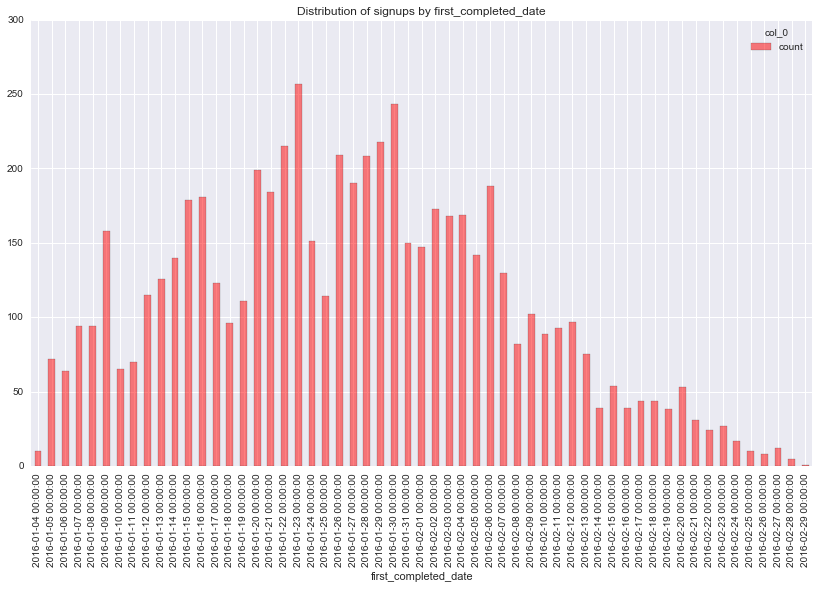

In [12]:
fc_ct = pd.crosstab(index = data['first_completed_date'],columns = "count")
ax = fc_ct.plot(kind="bar",
                 figsize=(14,8), color = "r",  alpha=.5, title = 'Distribution of signups by first_completed_date')


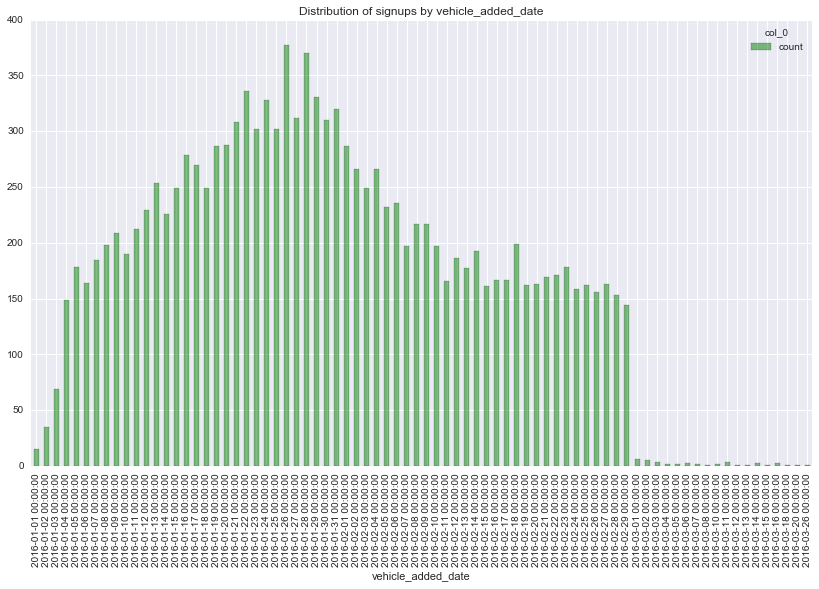

In [13]:
va_ct = pd.crosstab(index = data['vehicle_added_date'],columns = "count")
ax = va_ct.plot(kind="bar",
                 figsize=(14,8), color = "g",  alpha=.5, title = 'Distribution of signups by vehicle_added_date')

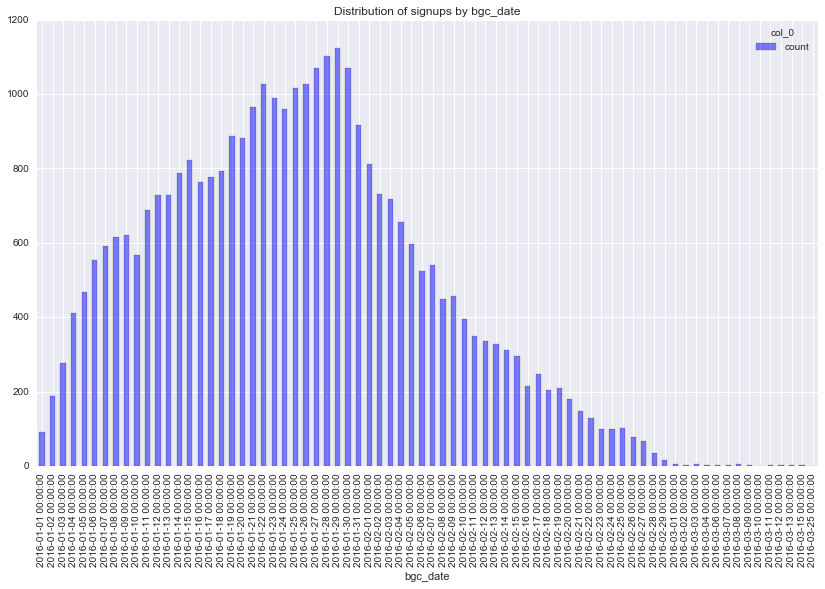

In [14]:
bgc_ct = pd.crosstab(index = data['bgc_date'],columns = "count")
ax = bgc_ct.plot(kind="bar",
                 figsize=(14,8), color = "b",  alpha=.5, title = 'Distribution of signups by bgc_date')

Let's take a look at the categorical variables

In [11]:
cities = set()
for i in data.city_name:
    cities.add(i)

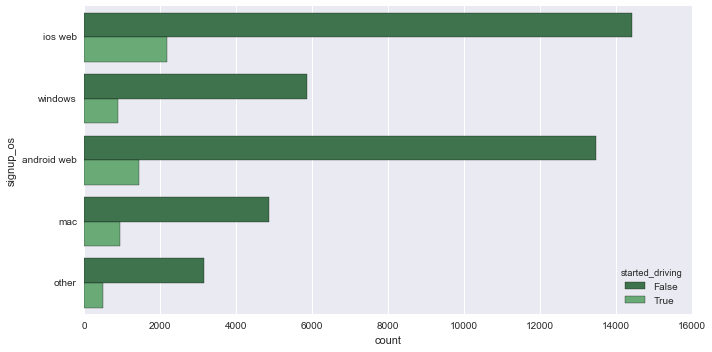

In [16]:
%matplotlib inline

plt.subplots(figsize=(10, 5), tight_layout=True)
ax = sns.countplot(y="signup_os", hue="started_driving", data=data, palette="Greens_d")

We can see higher number of drivers signed up using iOS and Android mobile platforms. 

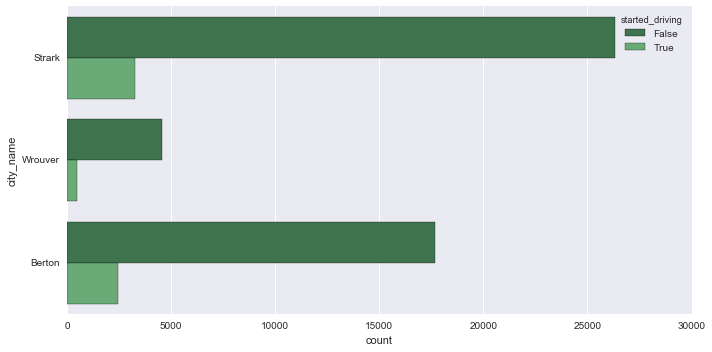

In [17]:
plt.subplots(figsize=(10, 5), tight_layout=True)
ax = sns.countplot(y="city_name", hue="started_driving", data=data, palette="Greens_d")

Also we have higher number of drivers from Strark, followed by Wtrouver and Berton

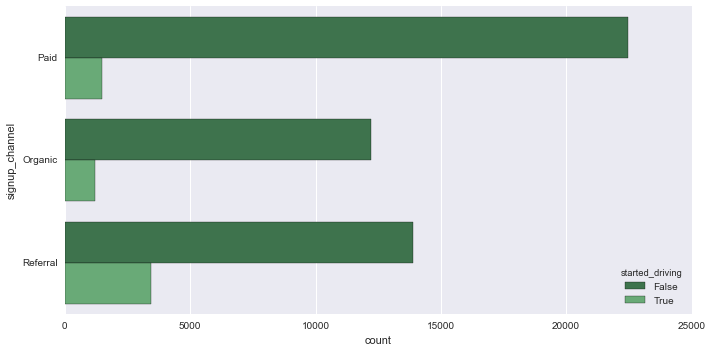

In [18]:
plt.subplots(figsize=(10, 5), tight_layout=True)
ax = sns.countplot(y="signup_channel", hue="started_driving", data=data, palette="Greens_d")

Higher number of drivers signed up via Paid channel, although we can appreciate that there's a higher proportion of singups that started driving when those were referred.

For the distribution of days between sign up date and other event:

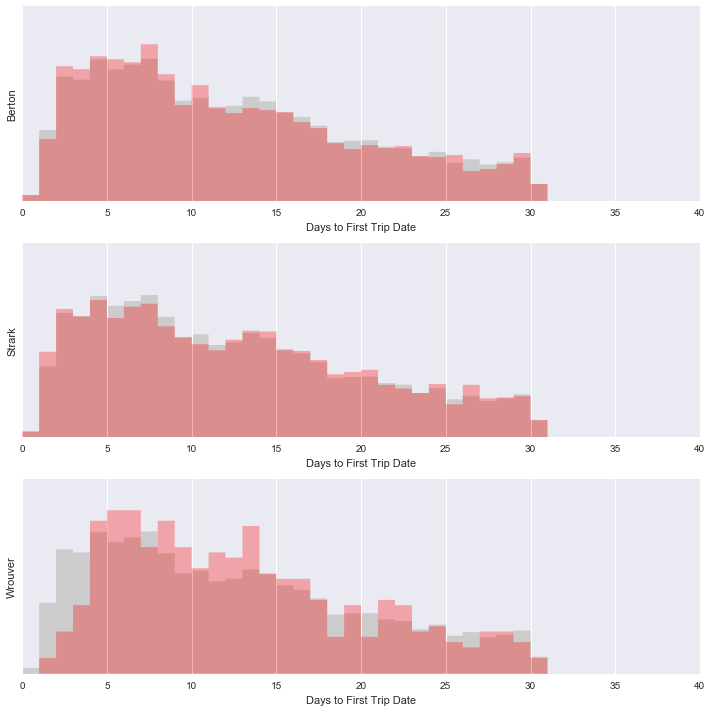

In [19]:
# Plot the distribution of days between signup_date and first_trip_date
%matplotlib inline
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), tight_layout=True)

bins = np.arange(0, 40, 1)

for ax, city_name in zip(axes.ravel(), cities):
    ax.hist(data[data[city_name] == 1].days_to_fc, 
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3, normed=True)
               
    ax.hist(data.days_to_fc, bins=bins, normed=True,
            histtype='stepfilled', ec='none', color='#cccccc',
            zorder=0)
    ax.set_yticks([])
    ax.set_xlabel("Days to First Trip Date")
    ax.set_ylabel(city_name)
    ax.set_ylim(0, .08)

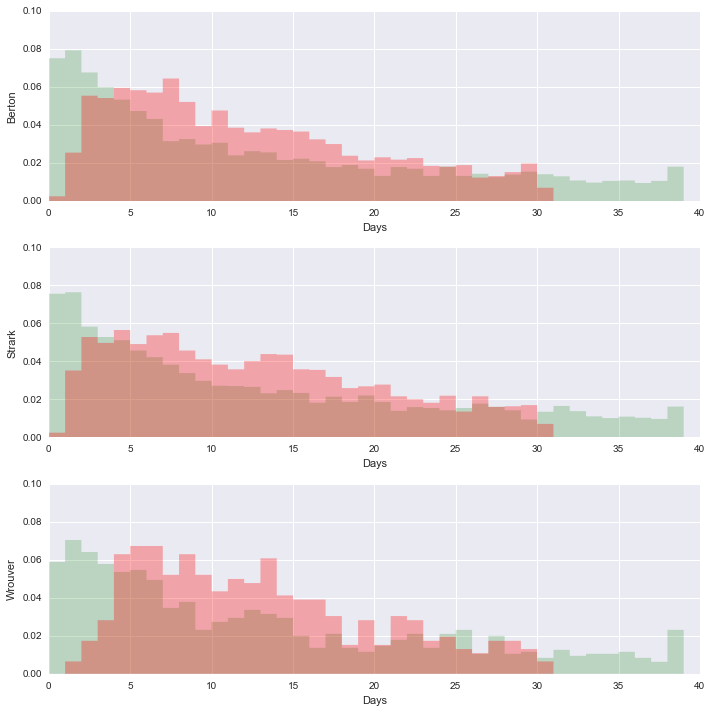

In [20]:
# Plot the distribution of days between signup_date and vehicle_added_date (green)
# and compare it with the distribution of days between signup_date and first_trip_date (red)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), tight_layout=True)

bins = np.arange(0, 40, 1)

for ax, city_name in zip(axes.ravel(), cities):
    ax.hist(data[data[city_name] == 1].days_to_va, 
            bins=bins, histtype='stepfilled', color='g', ec='none', alpha=.2, normed=True)
    ax.hist(data[data[city_name] == 1].days_to_fc, 
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3, normed=True)
            
    ax.set_xlabel("Days")
    ax.set_ylabel(city_name)
    ax.set_ylim(0, .1)

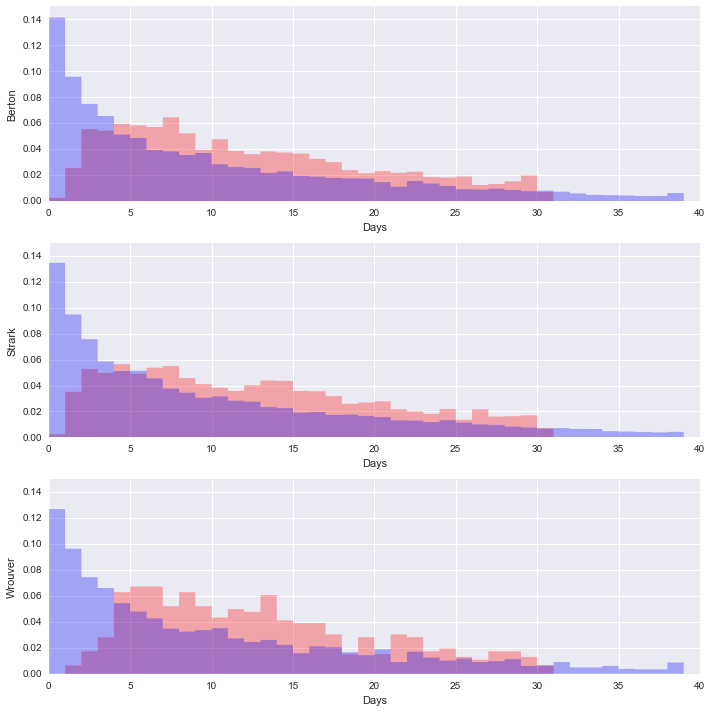

In [21]:
# Plot the distribution of days between signup_date and background_check_date (blue)
# and compare it with the distribution of days between signup_date and first_trip_date (red)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), tight_layout=True)

bins = np.arange(0, 40, 1)

for ax, city_name in zip(axes.ravel(), cities):
    ax.hist(data[data[city_name] == 1].days_to_fc, 
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3, normed=True)
    ax.hist(data[data[city_name] == 1].days_to_bgc, 
            bins=bins, histtype='stepfilled', color='b', ec='none', alpha=.3, normed=True)                 
    #ax.set_yticks([])
    ax.set_xlabel("Days")
    ax.set_ylabel(city_name)
    ax.set_ylim(0, .15)

Let's make now look at the ratios of singups vs drivers who took a first trip:

#### Ratio of Signups that took first drive by City

In [8]:
p_city = pd.crosstab(data['city_name'], data['started_driving']).apply(lambda r: r/r.sum(), axis=1)
p_city

started_driving,False,True
city_name,,
Berton,0.878859,0.121141
Strark,0.890415,0.109585
Wrouver,0.907929,0.092071


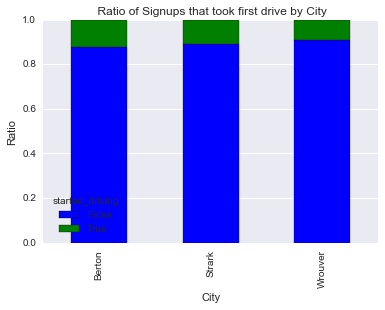

In [146]:
p_city_plt = p_city.div(p_city.sum(1).astype(float), axis=0)

p_city_plt.plot(kind='bar', 
                   stacked=True, 
                   title=' Ratio of Signups that took first drive by City')
d_colors = ['#2166ac',
                '#fee090']
plt.xlabel('City')
plt.ylabel('Ratio')


Berton has a higher rate of signups who started driving (12%) compared with Strark (11%) and Wrouver (9%). 

#### Ratio of Signups that took first drive by Channel

In [148]:
p_channel = pd.crosstab(data['signup_channel'], data['started_driving']).apply(lambda r: r/r.sum(), axis=1)
p_channel

started_driving,False,True
signup_channel,,
Organic,0.909883,0.090117
Paid,0.938090,0.061910
Referral,0.801051,0.198949


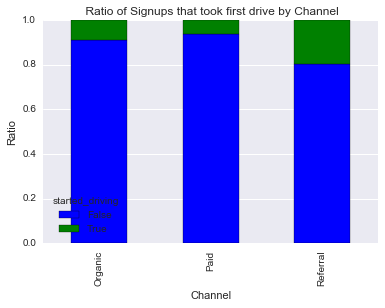

In [149]:
p_channel_plt = p_channel.div(p_channel.sum(1).astype(float), axis=0)

p_channel_plt.plot(kind='bar', 
                   stacked=True, 
                   title=' Ratio of Signups that took first drive by Channel')
plt.xlabel('Channel')
plt.ylabel('Ratio')

Signups referred are more than two times more prone to start driving (20%) than those we come via Organic (9%) or Paid (6%) channel. 

#### Ratio of Signups that took first drive by Device

In [150]:
p_os = pd.crosstab(data['signup_os'], data['started_driving']).apply(lambda r: r/r.sum(), axis=1)
p_os

started_driving,False,True
signup_os,,
android web,0.902703,0.097297
ios web,0.868266,0.131734
mac,0.837225,0.162775
other,0.863487,0.136513
windows,0.867473,0.132527


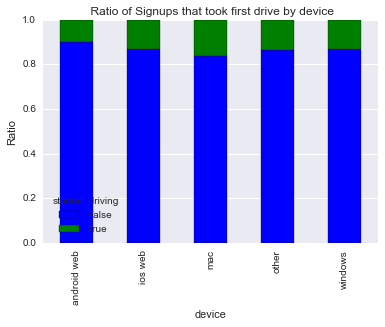

In [151]:
p_os_plt = p_os.div(p_os.sum(1).astype(float), axis=0)

p_os_plt.plot(kind='bar', 
                   stacked=True, 
                   title=' Ratio of Signups that took first drive by device')
plt.xlabel('device')
plt.ylabel('Ratio')

In terms of the device used, those who did sign up using a mac have a higher percentage of drivers who started using Uber, followed by Other, Windows, and IOs Web devices. The rate drops to almost half for those who signed up using an Android phone.  

### 2 & 3. Build Model and conclusions.

If I assume that those drivers with missing values in the column "first_completed_date" didn't take their first trip, then by looking at those who did, I can evaluate and extrapolate my finding to the group that didn't and see if any of them are close to taking their first ride.

Taking this into account, my first approach was to try to build a **Survival Analysis**. In this type of problem, the time duration of a sample of observations is analyzed until an event of death occurs. Here the "death" event is when the signup takes his or her first trip.

I took the first two months of data and considered February 29th as the last observed point in time, which means that everything after this day is (right) censored. After plotting the survival curve using Lifelines library, I noticed that something was wrong—the curve became flat at ~0.8. Going back, I looked at the distributions of days between signup and first trip and realized that the range was [1,30] for the positive cases and [30,60] for the negative ones. It's worth noting that due to the lack of additional data points (basically drivers that took more than 30 days to drive since signing up, as well as drivers that started within a month before the last observed point), I introduced a lot of bias to the model. I attempted this with only one month of data and censoring everything after January 31st, and obtained similar results.

My second approach was to simplify the problem as a classification type and apply **Gradient Boosting** algorithm. I performed feature transformations and created new features. Then by tuning some of the parameters for the algorithm, I obtained reasonably good predictions with the model (F1 score: 0.81, Precision: 0.79, Recall: 0.83, and Accuracy: 0.96), although with some overfitting. In order to fix this, I performed grid search with cross validation and used the best tuning parameters with GBM. This resulted on an improvement of the evaluation metrics (F1 score: 0.82, Precision: 0.80, Recall: 0.85, Accuracy: 0.96) and a model that generalizes very well without overfitting.

I also tried **Random Forest** algorithm with Cross-Validation that couldn't beat the performance of the GBM model (F1 score: 0.79, Precision: 0.78, Recall: 0.82, Accuracy: 0.96). The variables that seem to have a higher correlation with the target variable are **has_va** (0.59), **days_since_signup** (0.26), **has_bgc** (0.07), and **channel_referral** (0.02).

Finaly, because the event of registering the vehicle seems to be the strongest predictor in our model, I built a separate model with only those drivers who already registered this vehicle. That way, I was also able to include more variables related to the type of vehicle. I used GBM with C-V and got very good (almost perfect) results (F1 score: 0.99, Precision: 0.99, Recall: 0.99, Accuracy: 0.99). While the most important variables were **days_since_signup**, **vehicle_year** and **channel**.

These results can help Uber understand that those drivers who have already registered their vehicle and provided bgc consent, have a higher propensity to start driving. Likewise, the further away from the date of sign-up, the lower the likelihood to start driving. Lastly, those drivers who got referred are more prone to start driving than those who come from different channels. From the variable importance table, we can also extract that city and device are factors that don't really have much correlation with the likelihood to start driving.

A few strategies that Uber can develop from this analysis:
- Follow up with drivers who haven't taken their first ride 5 days after they signed up.
- Provide greater incentives for referral as they seem to generate the most signups that continue driving.
- Setup reminders and increase pressure to signups to provide bgc consent and to register their vehicles.

#### Survival Analysis
Attempt 1: Data from 01/01 to 02/29

In [24]:
from dateutil import rrule, parser
start = '2016-03-01'
end= '2016-03-31'    #Right censor data after February 29th 
dates_rm = list(rrule.rrule(rrule.DAILY,
                         dtstart=parser.parse(start),
                         until=parser.parse(end)))

In [25]:
data1 = data[~data['bgc_date'].isin(dates_rm)]
print "we've removed %s drivers" %(len(data)-len(data1))

we've removed 48 drivers


In [26]:
data1 = data1[~data1['vehicle_added_date'].isin(dates_rm)]
print "we've removed %s drivers" %(len(data)-len(data1))

we've removed 88 drivers


In [27]:
#Create first_completed_date, censored=started_driving, days since signup. 
data1['first_completed_date'] = data1['first_completed_date'].fillna('2016-02-29 00:00:00')
data1['first_completed_date'] =  pd.to_datetime(data1['first_completed_date'])
data1['days_since_signup'] = (data1['first_completed_date']  - data1['signup_date'])/ np.timedelta64(1, 'D')

In [28]:
data1.started_driving.value_counts().sort_index()

False    48460
True      6133
Name: started_driving, dtype: int64

We see that there are 48460 0-censor labelled signups and 6133 1-censor labelled signups in the dataset. 

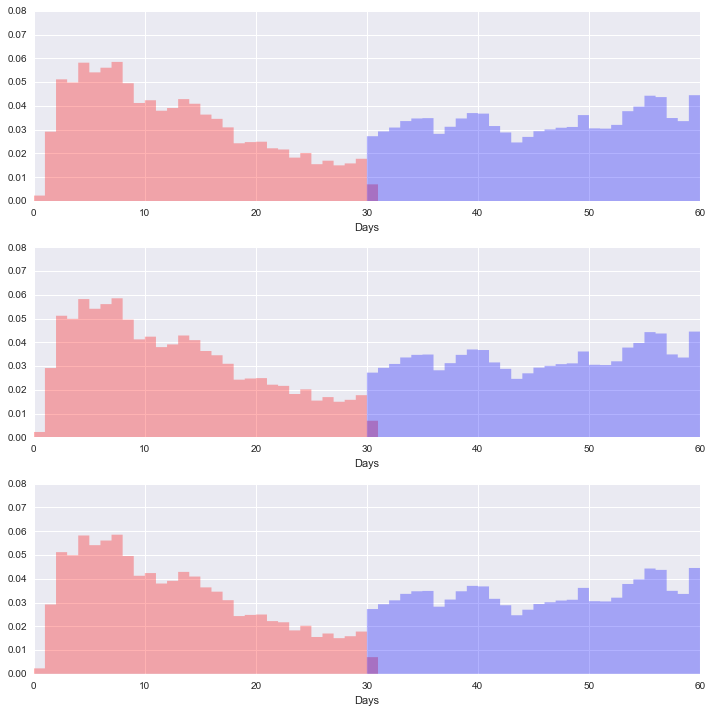

In [100]:
#pd.crosstab(data1['days_since_signup'], data1['started_driving'])
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), tight_layout=True)

bins = np.arange(0, 61, 1)

for ax, city_name in zip(axes.ravel(), cities):

    ax.hist(data1[data1['started_driving'] == 1].days_since_signup, 
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3, normed=True)
    ax.hist(data1[data1['started_driving'] == 0].days_since_signup, 
            bins=bins, histtype='stepfilled', color='b', ec='none', alpha=.3, normed=True)                 
    #ax.set_yticks([])
    ax.set_xlabel("Days")

    ax.set_ylim(0, .08)

Count of days between when the driver signed up and when they started driving (if they did) or the last observed date (February 29th). 
- In Red: drivers that started driving. 
- In Blue: drivers that never started driving. 

Plot the Survival Curve

In [75]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(data1.days_since_signup, event_observed=data1.started_driving)

<lifelines.KaplanMeierFitter: fitted with 54593 observations, 48460 censored>

In [76]:
import plotly
import plotly.tools as tls
import plotly.plotly as py
from plotly.graph_objs import Figure, Data, Layout
import matplotlib.pyplot as plt
from plotly.graph_objs import *
%matplotlib inline
from pylab import rcParams

def pyplot(fig, ci=True, legend=True):
    # Convert mpl fig obj to plotly fig obj, resize to plotly's default
    py_fig = tls.mpl_to_plotly(fig, resize=True)
    
    # Add fill property to lower limit line
    if ci == True:
        style1 = dict(fill='tonexty')
        # apply style
        py_fig['data'][2].update(style1)
        
        # Change color scheme to black
        py_fig['data'].update(dict(line=Line(color='black')))
    
    # change the default line type to 'step'
    py_fig['data'].update(dict(line=Line(shape='hv')))
    # Delete misplaced legend annotations 
    py_fig['layout'].pop('annotations', None)
    
    if legend == True:
        # Add legend, place it at the top right corner of the plot
        py_fig['layout'].update(
            showlegend=True,
            legend=Legend(
                x=1.05,
                y=1
            )
        )
        
    # Send updated figure object to Plotly, show result in notebook
    return py.iplot(py_fig)


In [77]:
import plotly.plotly as py
py.sign_in('ilopezfr', '831tys9ifw')
p = kmf.plot(ci_force_lines=True, title='Career Lengths of ODI players')
kmf1 = plt.gcf()
pyplot(kmf1)

/Users/iglopezfrancos/anaconda/lib/python2.7/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/Users/iglopezfrancos/anaconda/lib/python2.7/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [81]:
T = data1['days_since_signup']
C = data1['started_driving']

kmf.fit(T, C)

<lifelines.KaplanMeierFitter: fitted with 54593 observations, 48460 censored>

Plotting the survival Curve for each __City__:

Populating the interactive namespace from numpy and matplotlib


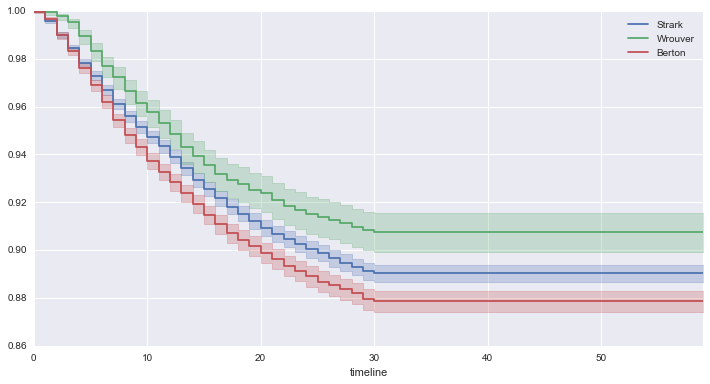

In [106]:
%pylab inline
figsize( 12,6)
ax = plt.subplot(111)
for r in data1['city_name'].unique():
    ix = data1['city_name'] == r
    kmf.fit(T.ix[ix], C.ix[ix], label=r)
    ax = kmf.plot(ax=ax)

Wrouver has a higher survival curve than the Strark and Berton.

Plotting the survival Curve for each __channel__:

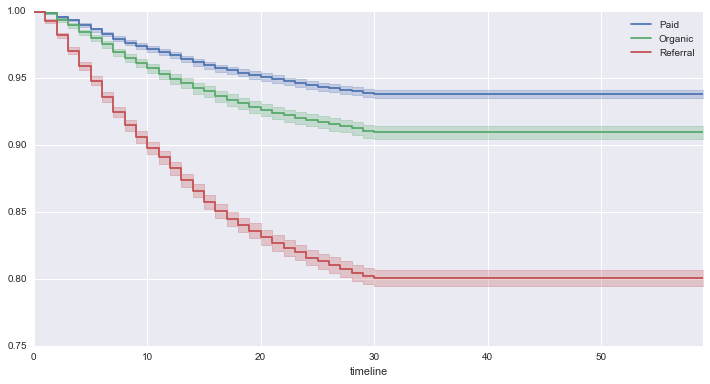

In [119]:
figsize( 12,6)
ax = plt.subplot(111)
for r in data1['signup_channel'].unique():
    ix = data1['signup_channel'] == r
    kmf.fit(T.ix[ix], C.ix[ix], label=r)
    ax = kmf.plot(ax=ax)

Paid and Organic have a higher survival curve. For Referral drivers the likelihood to start driving drops to 80% after 30 days since signup.

Plotting the survival Curve for each __channel__:

**Attempt 2**: Data from 01/01 to 01/31

In [6]:
from dateutil import rrule, parser
start = '2016-02-01' #Right censor data after January 31st 
end= '2016-03-31'  
dates_rm = list(rrule.rrule(rrule.DAILY,
                         dtstart=parser.parse(start),
                         until=parser.parse(end)))

In [7]:
data2 = data[~data['bgc_date'].isin(dates_rm)]
data2 = data2[~data2['vehicle_added_date'].isin(dates_rm)]
data2 = data2[~data2['first_completed_date'].isin(dates_rm)]

In [8]:
#Create first_completed_date, censored=started_driving, days since signup. 
data2['first_completed_date'] = data['first_completed_date'].fillna('2016-01-31 00:00:00')
data2['first_completed_date'] =  pd.to_datetime(data2['first_completed_date'])
data2['days_since_signup'] = (data2['first_completed_date']  - data2['signup_date'])/ np.timedelta64(1, 'D')

In [9]:
data2.started_driving.value_counts().sort_index()

False    37243
True      4028
Name: started_driving, dtype: int64

/Users/iglopezfrancos/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


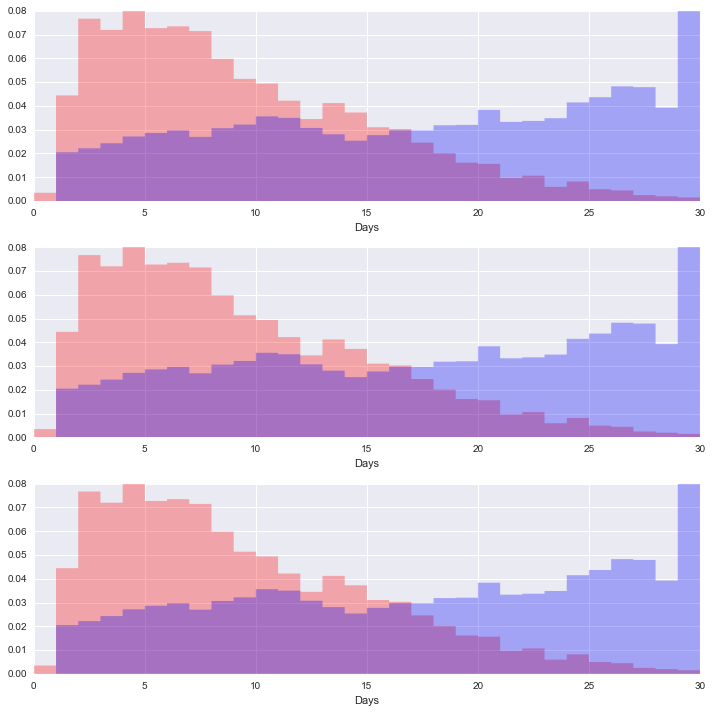

In [14]:
#pd.crosstab(data1['days_since_signup'], data1['started_driving'])
%matplotlib inline
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), tight_layout=True)

bins = np.arange(0, 31, 1)

for ax, city_name in zip(axes.ravel(), cities):

    ax.hist(data2[data2['started_driving'] == 1].days_since_signup, 
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3, normed=True)
    ax.hist(data2[data2['started_driving'] == 0].days_since_signup, 
            bins=bins, histtype='stepfilled', color='b', ec='none', alpha=.3, normed=True)                 
    #ax.set_yticks([])
    ax.set_xlabel("Days")

    ax.set_ylim(0, .08)

In [135]:
kmf2 = KaplanMeierFitter()
kmf2.fit(data2.days_since_signup, event_observed=data2.started_driving)

py.sign_in('ilopezfr', '831tys9ifw')
p = kmf2.plot(ci_force_lines=True, title='Career Lengths of ODI players')
kmf2_1 = plt.gcf()
pyplot(kmf2_1)

Conclusion from Survival Analysis:

With the current dataset and with only one month of data to project, we can say that the number of days since signup is inversely proportional to the likelihood of starting driving. For example, based on the Survival Curve there's a ~92% of chance that a driver will start driving if it's been only 15 days since he/she signed up. 

As we could expect, the results are very limited given the size of our data. We would need more months of data and as well higher quality in order to improve our model.  

### Modeling

A couple of decisions made when choosing the featured that are being included in the model: 
- Removed those features related to the vehicle, as they have around 75% missing values. 
- Left out date variables. Instead, included their transformations as days count and event binary variables. 
- Input missing values in singup_os with the most frequent value. 
- Dummy transformation of atergorical variables.

In [15]:
df = data2[['city_name','signup_os', 'signup_channel', 'days_since_signup', 
            'has_bgc','has_va','started_driving']]
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 54680
Data columns (total 7 columns):
city_name            41271 non-null object
signup_os            41271 non-null object
signup_channel       41271 non-null object
days_since_signup    41271 non-null float64
has_bgc              41271 non-null bool
has_va               41271 non-null bool
started_driving      41271 non-null bool
dtypes: bool(3), float64(1), object(3)
memory usage: 1.7+ MB


In [16]:
df = pd.concat([df, pd.get_dummies(df['city_name'], prefix='city')], axis=1)
df = pd.concat([df, pd.get_dummies(df['signup_os'], prefix='device')], axis=1)
df = pd.concat([df, pd.get_dummies(df['signup_channel'], prefix='channel')], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 54680
Data columns (total 18 columns):
city_name             41271 non-null object
signup_os             41271 non-null object
signup_channel        41271 non-null object
days_since_signup     41271 non-null float64
has_bgc               41271 non-null bool
has_va                41271 non-null bool
started_driving       41271 non-null bool
city_Berton           41271 non-null float64
city_Strark           41271 non-null float64
city_Wrouver          41271 non-null float64
device_android web    41271 non-null float64
device_ios web        41271 non-null float64
device_mac            41271 non-null float64
device_other          41271 non-null float64
device_windows        41271 non-null float64
channel_Organic       41271 non-null float64
channel_Paid          41271 non-null float64
channel_Referral      41271 non-null float64
dtypes: bool(3), float64(12), object(3)
memory usage: 5.2+ MB


In [17]:
import random
X = df[df.columns - ['started_driving','signup_os','signup_channel','city_name', \
                     'city_Berton', 'device_ios web','channel_Organic']]
Y = df['started_driving']
rows = random.sample(df.index, int(len(df)*.70))
x_train, y_train = X.ix[rows],Y.ix[rows]
x_test,y_test  = X.drop(rows),Y.drop(rows)

/Users/iglopezfrancos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


In [18]:
print "Rows in train set: %s" %len(x_train)
print "Rows in test set: %s" %len(x_test)

Rows in train set: 28889
Rows in test set: 12382


#### Gradient Boosting Model
Fit a Gradient Tree Boosting model. 

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': 200,'learning_rate': 0.1,'max_depth': 6}
gbm_model = GradientBoostingClassifier(**params).fit(x_train, y_train)

In [21]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, \
recall_score, confusion_matrix, classification_report
pred = gbm_model.predict(x_test)
print "F1 score:", f1_score(y_test, pred)
print "Precision:", precision_score(y_test, pred)
print "Recall:", recall_score(y_test, pred)
print "Accuracy:", accuracy_score(y_test, pred)

F1 score: 0.824831949387
Precision: 0.819968553459
Recall: 0.829753381066
Accuracy: 0.964222258117


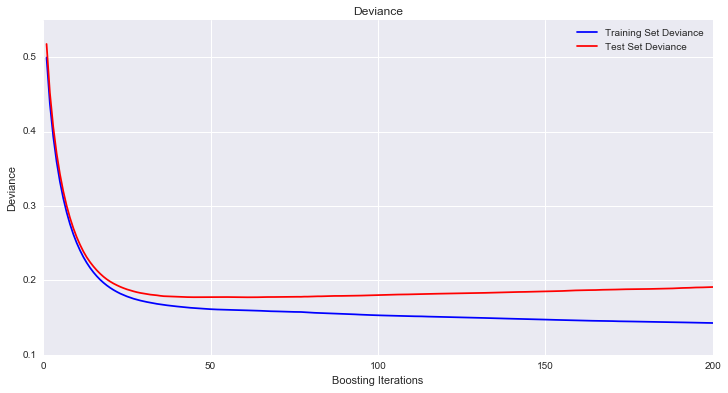

In [22]:
import matplotlib.pyplot as plt

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm_model.staged_decision_function(x_test)):
    test_score[i] = gbm_model.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbm_model.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

We can see that with the original set of parameters chosen, the separation between both training and testing curves indicates some overfitting, but in general a good balance between bias and variance. This model will require some parameter tuning.

In [23]:
cm = confusion_matrix(y_test, pred)
cm

array([[10896,   229],
       [  214,  1043]])

We'll now try **Cross-Validation** to find out the best set of tuning parameters for the GBM

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {'n_estimators': [200],
          'learning_rate': [0.1, 0.05],
          'max_depth': [1, 4, 6],
          'min_samples_leaf': [1],
          'max_features': [1.0, 0.5, 0.1],
          'subsample': [1.0, 0.5, 0.1]
         }

gbm_model = GradientBoostingClassifier()
gbm_cv_model = GridSearchCV(gbm_model, param_grid, scoring = "f1").fit(x_train, y_train)

In [58]:
gbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 1,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'n_estimators': 200,
 'subsample': 0.5}

In [59]:
param_best = gbm_cv_model.best_params_

In [60]:
gbm_model_best = GradientBoostingClassifier(**param_best).fit(x_train, y_train)

In [61]:
pred = gbm_model_best.predict(x_test)
print "F1 score:", f1_score(y_test, pred)
print "Precision:", precision_score(y_test, pred)
print "Recall:", recall_score(y_test, pred)
print "Accuracy:", accuracy_score(y_test, pred)

F1 score: 0.825346534653
Precision: 0.801538461538
Recall: 0.850612244898
Accuracy: 0.964383782911


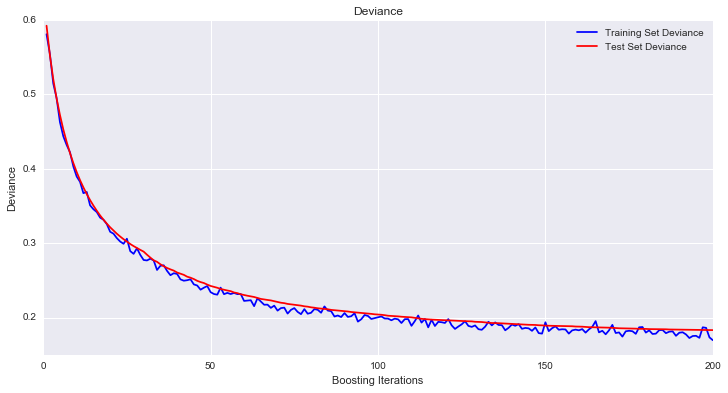

In [66]:
import matplotlib.pyplot as plt

# compute test set deviance
test_score = np.zeros((param_best['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm_model_best.staged_decision_function(x_test)):
    test_score[i] = gbm_model_best.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(param_best['n_estimators']) + 1, gbm_model_best.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(param_best['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Compared to the model with arbitary set of parameters, the model with the best set of parameter has no overfitting and generalize very well.

In [67]:
cm = confusion_matrix(y_test, pred)
cm

array([[10899,   258],
       [  183,  1042]])

#### Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(x_train, y_train)


features = X.columns
feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
10,has_va,0.581212
4,days_since_signup,0.268707
9,has_bgc,0.065796
1,channel_Referral,0.030936
0,channel_Paid,0.015294
2,city_Strark,0.009332
8,device_windows,0.006552
5,device_android web,0.006075
3,city_Wrouver,0.005980
6,device_mac,0.005487


In [70]:
# Evaluate the Random Forest model using cross-validation:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(rf_model, x_test, y_test, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.96758928  0.96316445  0.97133032], Average AUC 0.967361349564


In [71]:
pred_rf = rf_model.predict(x_test)
print "F1 score:", f1_score(y_test, pred_rf)
print "Precision:", precision_score(y_test, pred_rf)
print "Recall:", recall_score(y_test, pred_rf)
print "Accuracy:", accuracy_score(y_test, pred_rf)

F1 score: 0.798566878981
Precision: 0.779331779332
Recall: 0.818775510204
Accuracy: 0.959134227104


We can conclude that GBM beats RF this time. 

### Modeling (Part II)

Let's now build a model with those drivers that **registered their vehicle** (has_va = 1) and see if there's any correlation with the characteristics of the vehicle and the likelihood to start driving. 

In [53]:
data_va = data[data['has_va'] == 1]
data_va.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13134 entries, 3 to 54304
Data columns (total 20 columns):
id                      13134 non-null object
city_name               13134 non-null object
signup_os               12606 non-null object
signup_channel          13134 non-null object
signup_date             13134 non-null datetime64[ns]
bgc_date                12879 non-null datetime64[ns]
vehicle_added_date      13134 non-null datetime64[ns]
vehicle_make            13134 non-null object
vehicle_model           13134 non-null object
vehicle_year            13134 non-null float64
first_completed_date    5872 non-null datetime64[ns]
started_driving         13134 non-null bool
has_bgc                 13134 non-null bool
has_va                  13134 non-null bool
days_to_bgc             12879 non-null float64
days_to_va              13134 non-null float64
days_to_fc              5872 non-null float64
Berton                  13134 non-null float64
Strark                  13134 non-

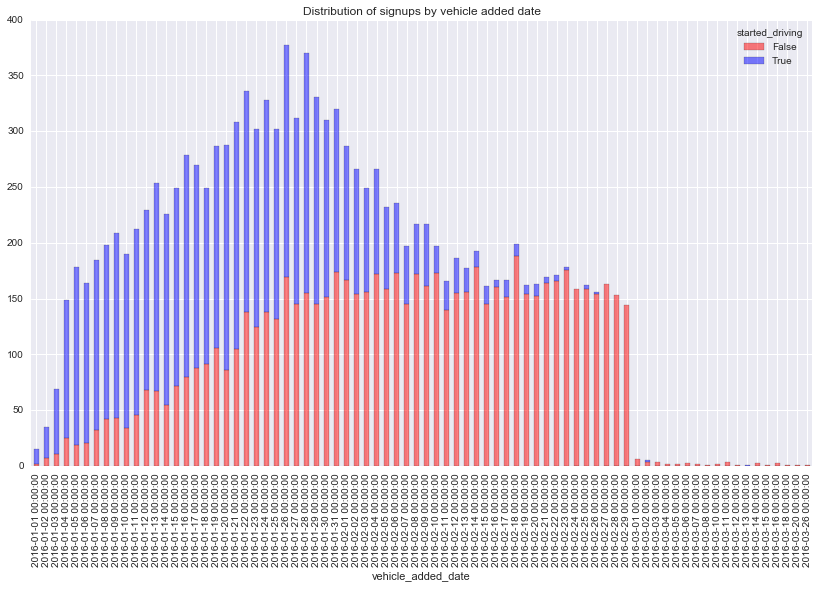

In [54]:
va_ct = pd.crosstab(index = data_va['vehicle_added_date'],columns = data_va['started_driving'])
ax = va_ct.plot(kind="bar", stacked = True,
                 figsize=(14,8), color =["r","b"],  alpha=.5, title = "Distribution of signups by vehicle added date")

In [55]:
data_va.apply(lambda x: sum(x.isnull()),axis=0)

id                         0
city_name                  0
signup_os                528
signup_channel             0
signup_date                0
bgc_date                 255
vehicle_added_date         0
vehicle_make               0
vehicle_model              0
vehicle_year               0
first_completed_date    7262
started_driving            0
has_bgc                    0
has_va                     0
days_to_bgc              255
days_to_va                 0
days_to_fc              7262
Berton                     0
Strark                     0
Wrouver                    0
dtype: int64

In [56]:
data_va.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,started_driving,has_bgc,has_va,days_to_bgc,days_to_va,days_to_fc,Berton,Strark,Wrouver
3,0 1\n1 2\n2 3...,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,True,True,True,5.0,5.0,5.0,1.0,0.0,0.0
4,0 1\n1 2\n2 3...,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT,False,True,True,15.0,16.0,NaN,0.0,1.0,0.0
5,0 1\n1 2\n2 3...,Strark,android web,Referral,2016-01-18,2016-01-18,2016-01-22,Cadillac,DTS,2006.0,NaT,False,True,True,0.0,4.0,NaN,0.0,1.0,0.0
6,0 1\n1 2\n2 3...,Strark,ios web,Paid,2016-01-14,2016-01-16,2016-01-21,Toyota,Prius V,2014.0,2016-01-23,True,True,True,2.0,7.0,9.0,0.0,1.0,0.0
10,0 1\n1 2\n2 3...,Strark,ios web,Referral,2016-01-18,2016-02-09,2016-02-24,Kia,Optima,2015.0,NaT,False,True,True,22.0,37.0,NaN,0.0,1.0,0.0


In [57]:
from dateutil import rrule, parser
start = '2016-03-01'   #Right censor data after February 29th  (for those who never started driving) 
end= '2016-03-31'    
dates_rm = list(rrule.rrule(rrule.DAILY,
                         dtstart=parser.parse(start),
                         until=parser.parse(end)))

#Remove every driver that registered their vehicle after Feb 29th. 
data_va1 = data_va[~data_va['vehicle_added_date'].isin(dates_rm)]   
print "we've removed %s drivers" %(len(data_va)-len(data_va1))

we've removed 43 drivers


In [58]:
# Fill up first_complete_date with last observation point (Feb 29th), create days_since_signup.
x = data_va1.loc[:,('first_completed_date')].fillna('2016-02-29 00:00:00')
data_va1['first_completed_date'] =  pd.to_datetime(x)
data_va1['days_since_signup'] = (data_va1['first_completed_date']  - data_va1['signup_date'])/ np.timedelta64(1, 'D')

/Users/iglopezfrancos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/iglopezfrancos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [59]:
data_va1.apply(lambda x: sum(x.isnull()),axis=0)

id                         0
city_name                  0
signup_os                524
signup_channel             0
signup_date                0
bgc_date                 243
vehicle_added_date         0
vehicle_make               0
vehicle_model              0
vehicle_year               0
first_completed_date       0
started_driving            0
has_bgc                    0
has_va                     0
days_to_bgc              243
days_to_va                 0
days_to_fc              7221
Berton                     0
Strark                     0
Wrouver                    0
days_since_signup          0
dtype: int64

In [60]:
#Select the variables for this model
df_va = data_va1[['city_name','signup_os', 'signup_channel', 'days_since_signup',
                 'vehicle_make', 'vehicle_model', 'vehicle_year', 'started_driving']]
                 
df_va = df_va.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_va.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13091 entries, 3 to 54304
Data columns (total 8 columns):
city_name            13091 non-null object
signup_os            13091 non-null object
signup_channel       13091 non-null object
days_since_signup    13091 non-null float64
vehicle_make         13091 non-null object
vehicle_model        13091 non-null object
vehicle_year         13091 non-null float64
started_driving      13091 non-null bool
dtypes: bool(1), float64(2), object(5)
memory usage: 831.0+ KB


In [61]:
# Create the dummies (Don't run this twice!)
df_va = pd.concat([df_va, pd.get_dummies(df_va['city_name'], prefix='city')], axis=1)
df_va = pd.concat([df_va, pd.get_dummies(df_va['signup_os'], prefix='device')], axis=1)
df_va = pd.concat([df_va, pd.get_dummies(df_va['signup_channel'], prefix='channel')], axis=1)
df_va = pd.concat([df_va, pd.get_dummies(df_va['vehicle_make'], prefix='v_make')], axis=1)  # For now let's just bring vehicle maker

In [62]:
df_va.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13091 entries, 3 to 54304
Data columns (total 65 columns):
city_name               13091 non-null object
signup_os               13091 non-null object
signup_channel          13091 non-null object
days_since_signup       13091 non-null float64
vehicle_make            13091 non-null object
vehicle_model           13091 non-null object
vehicle_year            13091 non-null float64
started_driving         13091 non-null bool
city_Berton             13091 non-null float64
city_Strark             13091 non-null float64
city_Wrouver            13091 non-null float64
device_android web      13091 non-null float64
device_ios web          13091 non-null float64
device_mac              13091 non-null float64
device_other            13091 non-null float64
device_windows          13091 non-null float64
channel_Organic         13091 non-null float64
channel_Paid            13091 non-null float64
channel_Referral        13091 non-null float64
v_make

In [49]:
vehicle = df_va['vehicle_make'] + df_va['vehicle_model']
print vehicle.unique()

['ToyotaCorolla' 'HyundaiSonata' 'CadillacDTS' 'ToyotaPrius V' 'KiaOptima'
 'DodgeDurango' 'Mercedes-BenzC-Class' 'InfinitiG Sedan' 'HondaCivic'
 'Fiat500X' 'CadillacEscalade' 'AcuraRDX' 'LexusES' 'ToyotaPrius'
 'HondaCR-V' 'LexusCT' 'GMCTerrain' 'PontiacG6' 'HondaCivic Hybrid'
 'NissanVersa' 'HondaOdyssey' 'JeepGrand Cherokee' 'VolkswagenGTI'
 'FordF-150' 'AudiA4' 'HondaInsight Hybrid' 'HyundaiElantra' 'ToyotaCamry'
 'NissanSentra' 'ChevroletMalibu' 'KiaSoul' 'NissanAltima' 'DodgeJourney'
 'JeepCompass' 'BMW3-series' 'ChevroletCruze' 'SubaruForester'
 'BuickCentury' 'HondaAccord' 'MazdaMAZDA3' 'SubaruXV Crosstrek'
 'DodgeCharger' 'FordFlex' 'BMW7-series' 'ToyotaRAV4' 'ChevroletTraverse'
 'DodgeAvenger' 'VolkswagenJetta' 'FordExpedition' 'LexusIS'
 'ChryslerTown and Country' 'ToyotaSienna' 'ScioniM' 'FordFreestyle'
 'SaturnVUE' 'ToyotaAvalon' 'ToyotaTacoma' 'MazdaMAZDA6' 'DodgeDart'
 'ChevroletSuburban' 'NissanXterra' 'KiaForte' 'ToyotaHighlander'
 'HyundaiSanta Fe' 'FordFocus' 'Infini

Separate predictors from target variable, and split the dataset 70-30

In [67]:
import random
X = df_va[df_va.columns - ['started_driving','signup_os','signup_channel','city_name', 'vehicle_make','vehicle_model', \
                     'city_Berton', 'device_other','channel_Organic', 'v_make_Acura']]  #Remove one of the labels from each categorical var.
Y = df_va['started_driving']
rows = random.sample(df_va.index, int(len(df_va)*.70))
x_train, y_train = X.ix[rows],Y.ix[rows]
x_test,y_test  = X.drop(rows),Y.drop(rows)

/Users/iglopezfrancos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {'n_estimators': [200],
          'learning_rate': [0.1, 0.05],
          'max_depth': [1, 4, 6],
          'min_samples_leaf': [1],
          'max_features': [1.0, 0.5, 0.1],
          'subsample': [1.0, 0.5, 0.1]
         }

gbm_model_va = GradientBoostingClassifier()
gbm_cv_model_va = GridSearchCV(gbm_model_va, param_grid, scoring = "f1").fit(x_train, y_train)

In [71]:
gbm_cv_model_va.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'n_estimators': 200,
 'subsample': 0.1}

In [72]:
param_best = gbm_cv_model_va.best_params_

In [73]:
gbm_model_best = GradientBoostingClassifier(**param_best).fit(x_train, y_train)

In [74]:
pred = gbm_model_best.predict(x_test)
print "F1 score:", f1_score(y_test, pred)
print "Precision:", precision_score(y_test, pred)
print "Recall:", recall_score(y_test, pred)
print "Accuracy:", accuracy_score(y_test, pred)

F1 score: 0.997154240182
Precision: 0.999429549344
Recall: 0.994889267462
Accuracy: 0.997454175153


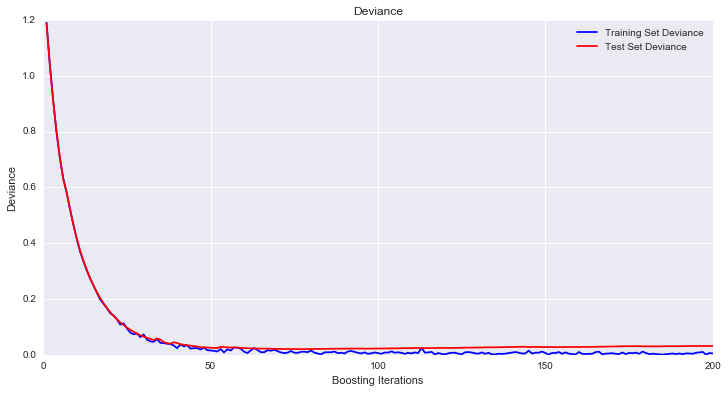

In [75]:
import matplotlib.pyplot as plt

# compute test set deviance
test_score = np.zeros((param_best['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm_model_best.staged_decision_function(x_test)):
    test_score[i] = gbm_model_best.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(param_best['n_estimators']) + 1, gbm_model_best.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(param_best['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [76]:
cm = confusion_matrix(y_test, pred)
cm

array([[2166,    1],
       [   9, 1752]])

In [79]:
features = X.columns
feature_importances = gbm_model_best.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
4,days_since_signup,0.423092
54,vehicle_year,0.166807
0,channel_Paid,0.051915
1,channel_Referral,0.043705
6,device_ios web,0.036701
7,device_mac,0.034359
5,device_android web,0.032892
2,city_Strark,0.031706
22,v_make_GMC,0.024895
23,v_make_Honda,0.022936


This time, with the dataset of just those drivers that already registerd their vehicle, the model perfoms really good and generalizes well. 
We observe that the most important variables are days_since_signup, vehicle_year and channel. 